<a href="https://colab.research.google.com/github/nadhimmna/Tugas-Machine-Learning/blob/main/UAS/UAS_Machine_Learning_(CIFAR10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama       : Muhammad Nadhim Abdirrahman
* NIM        : 1103210018
* Model      : CIFAR10 CNN

In [218]:
# Import library yang dibutuhkan
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [219]:
# Load dataset CIFAR-10 dari TensorFlow datasets
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi gambar dengan mengubah tipe data menjadi float32 dan membagi nilai piksel dengan 255 (nilai maksimum piksel)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


In [220]:
# Mengambil dimensi dari array train_images yang merupakan dataset gambar untuk pelatihan
train_images.shape

(50000, 32, 32, 3)

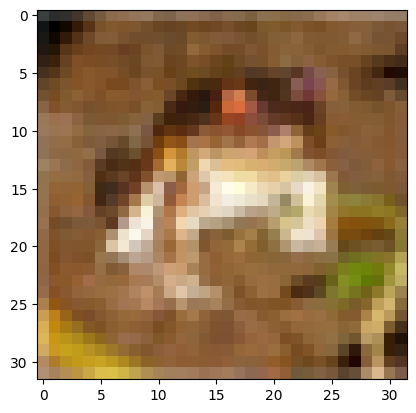

In [221]:
# Menampilkan gambar dalam dataset pelatihan
plt.imshow(train_images[0])

In [222]:
# Mendapatkan label untuk gambar pertama dalam dataset pelatihan
train_labels[0][0]

6

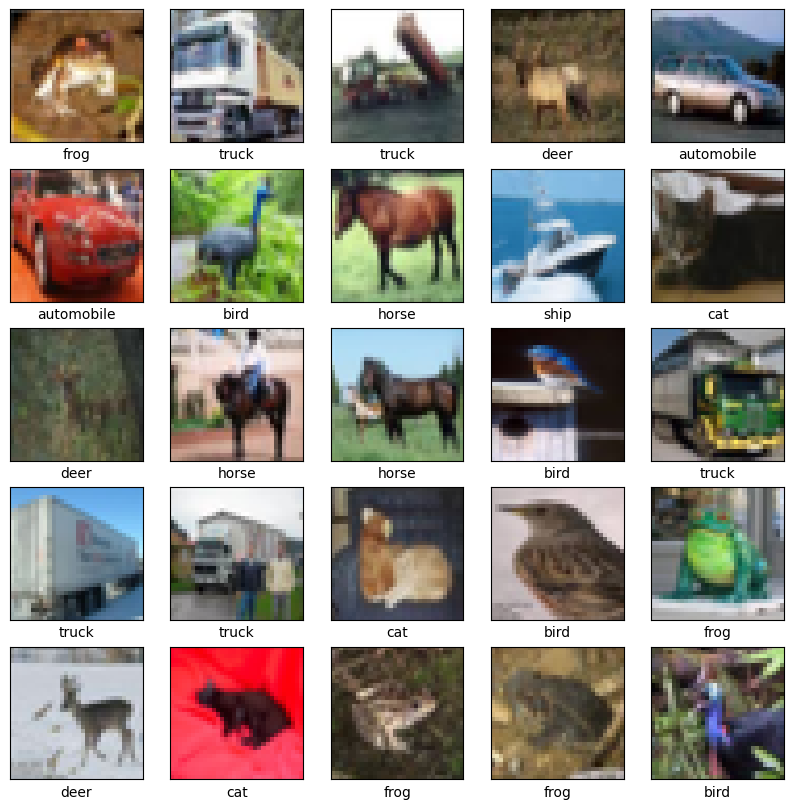

In [223]:
# Mengubah kelas menjadi kategori
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Menampilkan 25 gambar acak dari dataset pelatihan
plt.figure(figsize=(10,10))
for i in range(25):

    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [224]:
# Konversi label kategorikal ke dalam bentuk one-hot encoding menggunakan to_categorical dari keras.utils
train_labelsH = to_categorical(train_labels)
test_labelsH = to_categorical(test_labels)

In [225]:
train_labelsH.shape[0]

50000

In [227]:
# Mendefinisikan arsitektur model neural network menggunakan Sequential model dari keras.models
model = models.Sequential([
    # Layer konvolusi dengan 32 filter ukuran 3x3, fungsi aktivasi ReLU, dan input gambar berukuran 32x32x3
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Layer MaxPooling untuk mereduksi dimensi spasial gambar
    layers.MaxPooling2D((2, 2)),
    # Layer konvolusi dengan 64 filter ukuran 3x3 dan fungsi aktivasi ReLU
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Layer MaxPooling untuk mereduksi dimensi spasial gambar
    layers.MaxPooling2D((2, 2)),
    # Flatten layer untuk meratakan output dari layer sebelumnya menjadi vektor satu dimensi
    layers.Flatten(),
    # Hidden layer dengan 64 neuron dan fungsi aktivasi ReLU
    layers.Dense(64, activation='relu'),
    # Output layer dengan 10 neuron (jumlah kelas) dan fungsi aktivasi softmax
    layers.Dense(10, activation='softmax')
])

In [228]:
# Compile model dengan optimizer Adam, loss function categorical_crossentropy, dan metrik akurasi
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model menggunakan metode fit() pada objek model
history = model.fit(train_images, train_labelsH, epochs=100, batch_size=200, validation_data=(test_images, test_labelsH))

Epoch 1/100
250/250 [==============================] - 4s 9ms/step - loss: 1.6824 - accuracy: 0.3908 - val_loss: 1.4422 - val_accuracy: 0.4847
Epoch 2/100
250/250 [==============================] - 2s 7ms/step - loss: 1.3236 - accuracy: 0.5325 - val_loss: 1.2547 - val_accuracy: 0.5597
Epoch 3/100
250/250 [==============================] - 2s 7ms/step - loss: 1.1916 - accuracy: 0.5833 - val_loss: 1.1815 - val_accuracy: 0.5837
Epoch 4/100
250/250 [==============================] - 2s 8ms/step - loss: 1.1113 - accuracy: 0.6130 - val_loss: 1.0897 - val_accuracy: 0.6215
Epoch 5/100
250/250 [==============================] - 2s 10ms/step - loss: 1.0415 - accuracy: 0.6379 - val_loss: 1.0604 - val_accuracy: 0.6349
Epoch 6/100
250/250 [==============================] - 2s 7ms/step - loss: 1.0001 - accuracy: 0.6526 - val_loss: 1.0503 - val_accuracy: 0.6364
Epoch 7/100
250/250 [==============================] - 2s 7ms/step - loss: 0.9659 - accuracy: 0.6667 - val_loss: 0.9776 - val_accuracy: 0.660

In [229]:
# Melakukan prediksi menggunakan model pada dataset gambar uji
y_predict = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [230]:
np.round(y_predict[1])

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

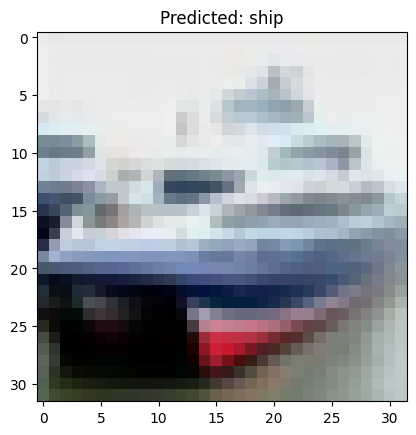

In [231]:
# Menampilkan gambar dari dataset uji beserta label prediksi yang didapatkan dari model
plt.figure()
plt.imshow(test_images[1])
plt.title(f"Predicted: {class_names[np.argmax(y_predict[1])]}")
plt.show()

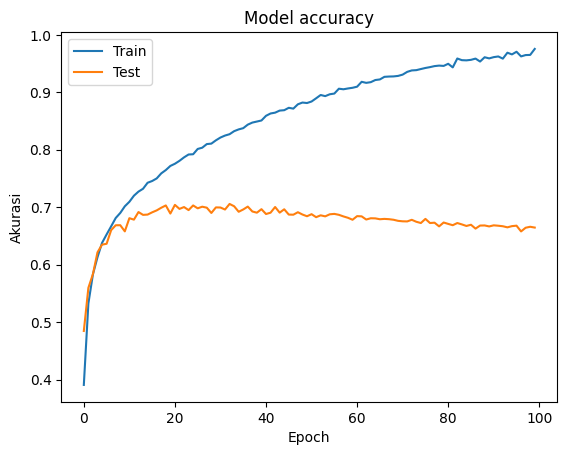

In [232]:
# Menampilkan grafik akurasi pelatihan dan validasi dari riwayat pelatihan model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

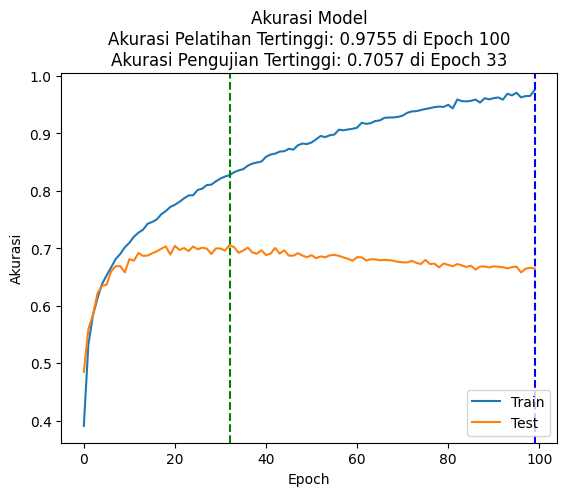

In [233]:
# Ekstrak nilai akurasi dari riwayat pelatihan
akurasi_pelatihan = history.history['accuracy']
akurasi_validasi = history.history['val_accuracy']

# Mencari indeks epoch dengan akurasi pelatihan tertinggi
epoch_terbaik_pelatihan = np.argmax(akurasi_pelatihan)
# Mendapatkan nilai akurasi pelatihan tertinggi
akurasi_terbaik_pelatihan = akurasi_pelatihan[epoch_terbaik_pelatihan]

# Mencari indeks epoch dengan akurasi validasi tertinggi
epoch_terbaik_validasi = np.argmax(akurasi_validasi)
# Mendapatkan nilai akurasi validasi tertinggi
akurasi_terbaik_validasi = akurasi_validasi[epoch_terbaik_validasi]

# Plot akurasi pelatihan dan validasi
plt.plot(akurasi_pelatihan, label='Train')
plt.plot(akurasi_validasi, label='Test')
plt.title(f'Akurasi Model\nAkurasi Pelatihan Tertinggi: {akurasi_terbaik_pelatihan:.4f} di Epoch {epoch_terbaik_pelatihan + 1}\nAkurasi Pengujian Tertinggi: {akurasi_terbaik_validasi:.4f} di Epoch {epoch_terbaik_validasi + 1}')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.axvline(x=epoch_terbaik_pelatihan, color='b', linestyle='--', label=f'Epoch Terbaik Pelatihan ({epoch_terbaik_pelatihan + 1})')
plt.axvline(x=epoch_terbaik_validasi, color='g', linestyle='--', label=f'Epoch Terbaik Validasi ({epoch_terbaik_validasi + 1})')
plt.show()